In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Functions

In [2]:
def plot_1D_hist(samples, title, bins=100, xlabel='x axis', ylabel='y axis') -> None:
  plt.figure()
  plt.hist(samples, bins=bins, density=True)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)

### Parameters

In [3]:
F = len('Jakub')
L = len('Grzesiak')

## Excercise 1 -  Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,246.6150,242.0,228.0,264.0,274.0,245.0
1,0.0,0.0,62.0984,64.0,67.0,73.0,58.0,78.0
2,0.0,0.0,379.8530,405.0,352.0,382.0,381.0,398.0
3,0.0,0.0,109.9460,103.0,101.0,96.0,103.0,102.0
4,0.0,0.0,76.8199,94.0,73.0,79.0,67.0,74.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,111.6080,105.0,106.0,111.0,111.0,107.0
996,0.0,0.0,206.6900,221.0,198.0,203.0,183.0,218.0
997,0.0,0.0,117.9790,119.0,95.0,123.0,115.0,137.0
998,0.0,0.0,22.5199,27.0,23.0,25.0,19.0,30.0


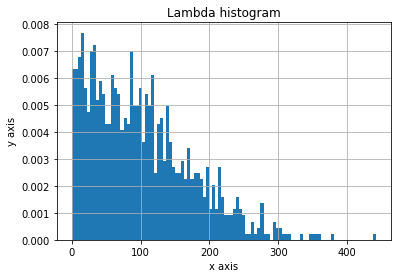

In [7]:
lbd = df['lambda']

plot_1D_hist(samples=lbd, title="Lambda histogram")

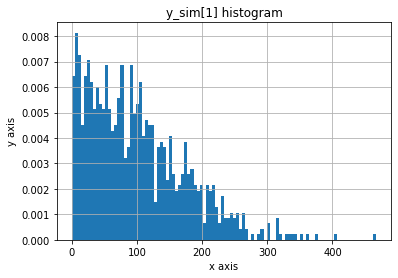

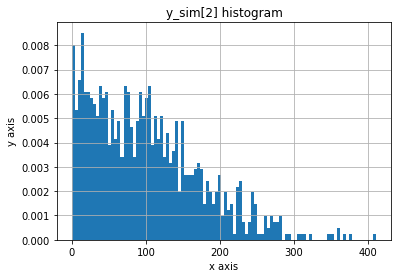

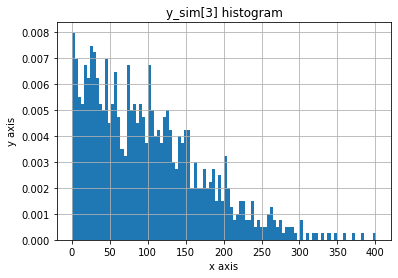

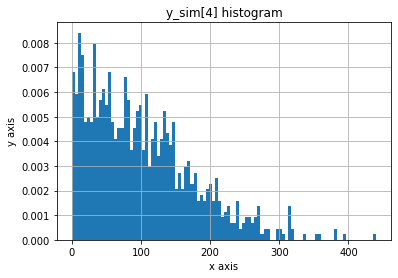

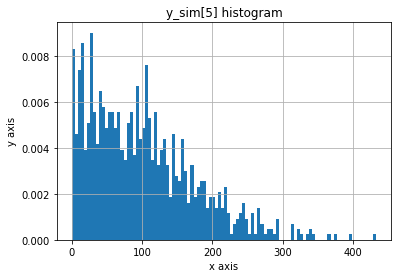

In [8]:
for n in range(1,6):
    y_sim_name = 'y_sim[' + str(n) + ']'
    y_sim_n = df[y_sim_name]
    plot_1D_hist(samples=y_sim_n, title=y_sim_name + ' histogram')

## Excercise 2 - Constraints on the data 

In [9]:
N = 2
y = [0,1]

cd2= CmdStanModel(stan_file='code_2.stan')
cd2_samples = cd2.sample(data={'N':N, 'y':y})

cd3 = CmdStanModel(stan_file='code_3.stan')
cd3_samples = cd3.sample(data={'N':N, 'y':y})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


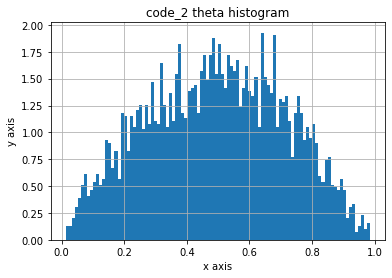

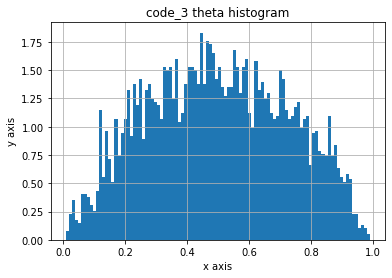

In [10]:
cd2_theta = cd2_samples.stan_variable('theta')
cd3_theta = cd3_samples.stan_variable('theta')

plot_1D_hist(samples=cd2_theta, title='code_2 theta histogram')
plot_1D_hist(samples=cd3_theta, title='code_3 theta histogram')

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)





chain 1 |███▍      | 00:01 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▉      | 00:01 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████▎     | 00:01 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |████▊     | 00:02 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▏    | 00:02 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▍    | 00:02 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▋    | 00:02 Iteration: 3800 / 7000 [ 54%]  (Sampling)


chain 1 |█████▉    | 00:02 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 4200 / 7000 [


INFO:cmdstanpy:CmdStan done processing.


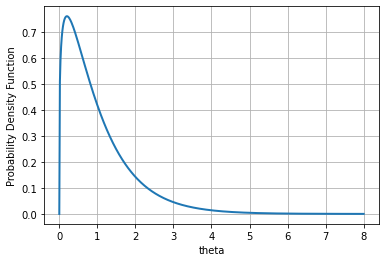

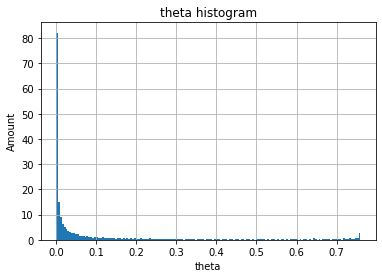

In [11]:
cd4 = CmdStanModel(stan_file='code_4.stan')
cd4 = cd4.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
cd4.diagnose()

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.grid(True)
plt.show()

## add histogram of theta samples with 160 bins
plot_1D_hist(samples=pdfs, title='theta histogram', bins=160, xlabel='theta', ylabel='Amount')

### Constrained parameter

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███▏      | 00:00 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)



chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |█████▏    | 00:01 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▌    | 00:01 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▉    | 00:01 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████▍   | 00:01 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▏  | 00:01 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 5200 / 7000 [ 74%]  (Sampling)


chain 1 |████████  | 00:02 Iteration: 5500 / 7000 [ 78%]  (Sampling)


chain 1 |████████▍ | 00:02 Iteration: 5800 / 7000 [ 82%]  (Sampling)


chain 1 |██████

INFO:cmdstanpy:CmdStan done processing.


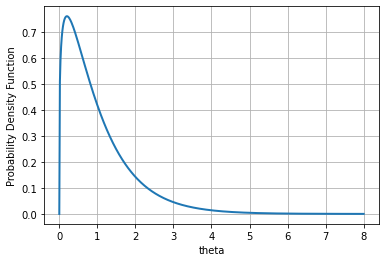

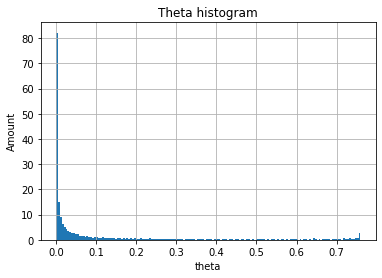

In [12]:
cd5 = CmdStanModel(stan_file='code_5.stan')
cd5_gamma = cd5.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
cd5_gamma.diagnose()

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.grid(True)
plt.show()

## add histogram of theta samples from the second model with 160 bins
plot_1D_hist(samples=pdfs, title='Theta histogram', bins=160, xlabel='theta', ylabel='Amount')

## Excercise 4 -  Selection of parameters using equation solving



In [13]:
cd6 = CmdStanModel(stan_file='code_6.stan')

# F = len('Jakub')
# L = len('Grzesiak')
y0 = 1 # initial guess for the equation solving

parameters = cd6.sample(data={'y_guess':[y0],'theta':[(F+L)/2]}, fixed_param=True, iter_sampling=1, iter_warmup=0, chains =1)
parameters.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.52346


## Excercise 5 - different methods of defining models


In [14]:
cd7 = CmdStanModel(stan_file='code_7.stan')
cd8 = CmdStanModel(stan_file='code_8.stan')
cd9 = CmdStanModel(stan_file='code_9.stan')

data = {'N':F}
seed = 28012000

cd7_samples = cd7.sample(data=data, seed=seed)
cd8_samples = cd8.sample(data=data, seed=seed)
cd9_samples = cd9.sample(data=data, seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


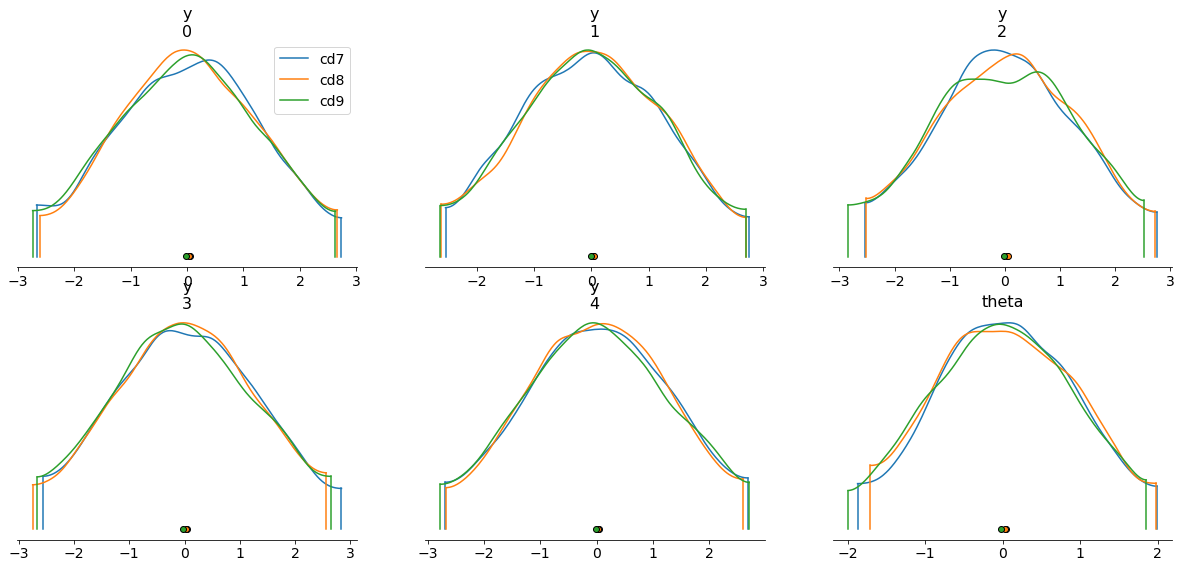

In [15]:
az.plot_density([cd7_samples, cd8_samples, cd9_samples], data_labels=['cd7', 'cd8', 'cd9'])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing


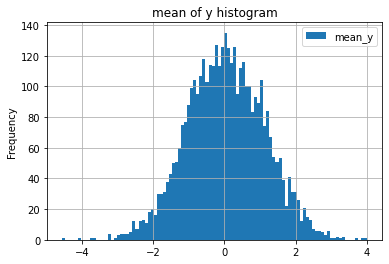

In [23]:
cd_10 = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
data = {'N':F}
mean_of_y = cd_10.generate_quantities(data=data, mcmc_sample = cd8_samples)
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

df.plot.hist(bins=100)
plt.grid(True)
plt.title('mean of y histogram')
plt.show()
